In [11]:
# install & import libraries
%pip install geopandas
%pip install contextily


Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 37.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import requests
import contextily as cx

In [4]:
building_footprints = "layer-101290" # building footprints in NZ
auckland_central_coords_nztm = "5920083.147 1757191.091" # X,Y point for Auckland central in NZTM

# query Land information NZ API 
query = f"https://data.linz.govt.nz/services;key=05b12bba80fa4dba9031556ec4d2f4f9/wfs?service=WFS&version=2.0.0&request=GetFeature&typeNames={building_footprints}&cql_filter=DWithin(shape,POINT({auckland_central_coords_nztm}),10000,meters) AND use='Supermarket'&outputformat=json"
response = requests.get(query).json()
#response

In [5]:
# define auckland supermarkets as geopandas dataframe 
supermarkets = gpd.GeoDataFrame.from_features(response['features'])
supermarkets.set_geometry('geometry', inplace=True)
supermarkets.set_crs(epsg=2193, inplace=True)

supermarkets['organisation']  = [text.split()[0] for text in supermarkets['name']] # return organisation from name field 
supermarkets['centroid'] = supermarkets.centroid
supermarkets

,geometry,building_id,name,use,suburb_locality,town_city,territorial_authority,capture_method,capture_source_group,capture_source_id,capture_source_name,capture_source_from,capture_source_to,last_modified,organisation,centroid
0,"MULTIPOLYGON (((1758030.719 5920817.455, 17580...",4678708,Countdown Auckland City,Supermarket,Auckland Central,Auckland,Auckland,Trace Orthophotography,NZ Aerial Imagery,1014,Auckland 0.075m Urban Aerial Photos (2017),2017-03-15Z,2017-05-06Z,2020-07-01Z,Countdown,POINT (1758074.167 5920829.717)
1,"MULTIPOLYGON (((1751610.924 5912265.637, 17515...",4678711,Countdown Blockhouse Bay,Supermarket,Blockhouse Bay,Auckland,Auckland,Trace Orthophotography,NZ Aerial Imagery,1014,Auckland 0.075m Urban Aerial Photos (2017),2017-03-15Z,2017-05-06Z,2020-07-01Z,Countdown,POINT (1751616.363 5912287.097)
2,"MULTIPOLYGON (((1757594.905 5928928.977, 17576...",4678730,Countdown Milford,Supermarket,Milford,Auckland,Auckland,Trace Orthophotography,NZ Aerial Imagery,1014,Auckland 0.075m Urban Aerial Photos (2017),2017-03-15Z,2017-05-06Z,2020-07-01Z,Countdown,POINT (1757631.346 5928937.579)
3,"MULTIPOLYGON (((1752422.413 5918219.637, 17524...",4678749,Countdown Pt Chevalier,Supermarket,Point Chevalier,Auckland,Auckland,Trace Orthophotography,NZ Aerial Imagery,1014,Auckland 0.075m Urban Aerial Photos (2017),2017-03-15Z,2017-05-06Z,2020-07-01Z,Countdown,POINT (1752433.551 5918208.530)
4,"MULTIPOLYGON (((1765332.121 5914523.500, 17653...",4678773,DaHua Supermarket Panmure,Supermarket,Panmure,Auckland,Auckland,Trace Orthophotography,NZ Aerial Imagery,1014,Auckland 0.075m Urban Aerial Photos (2017),2017-03-15Z,2017-05-06Z,2020-07-01Z,DaHua,POINT (1765350.626 5914531.571)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,"MULTIPOLYGON (((1754357.887 5919856.351, 17543...",4001591,Countdown Grey Lynn,Supermarket,Westmere,Auckland,Auckland,Feature Extraction,NZ Aerial Imagery,1014,Auckland 0.075m Urban Aerial Photos (2017),2017-03-15Z,2017-05-06Z,2020-07-01Z,Countdown,POINT (1754367.025 5919899.748)
70,"MULTIPOLYGON (((1753805.511 5914371.464, 17538...",4017159,Countdown Mt Roskill,Supermarket,Wesley,Auckland,Auckland,Feature Extraction,NZ Aerial Imagery,1014,Auckland 0.075m Urban Aerial Photos (2017),2017-03-15Z,2017-05-06Z,2020-07-01Z,Countdown,POINT (1753850.055 5914374.748)
71,"MULTIPOLYGON (((1755907.505 5916840.358, 17559...",4024591,Farro Mt Eden,Supermarket,Mount Eden,Auckland,Auckland,Feature Extraction,NZ Aerial Imagery,1014,Auckland 0.075m Urban Aerial Photos (2017),2017-03-15Z,2017-05-06Z,2020-07-01Z,Farro,POINT (1755910.551 5916823.069)
72,"MULTIPOLYGON (((1755214.982 5914770.131, 17551...",4025069,Tai Ping Trading Co Dominion,Supermarket,Mount Roskill,Auckland,Auckland,Feature Extraction,NZ Aerial Imagery,1014,Auckland 0.075m Urban Aerial Photos (2017),2017-03-15Z,2017-05-06Z,2020-07-01Z,Tai,POINT (1755210.174 5914819.859)


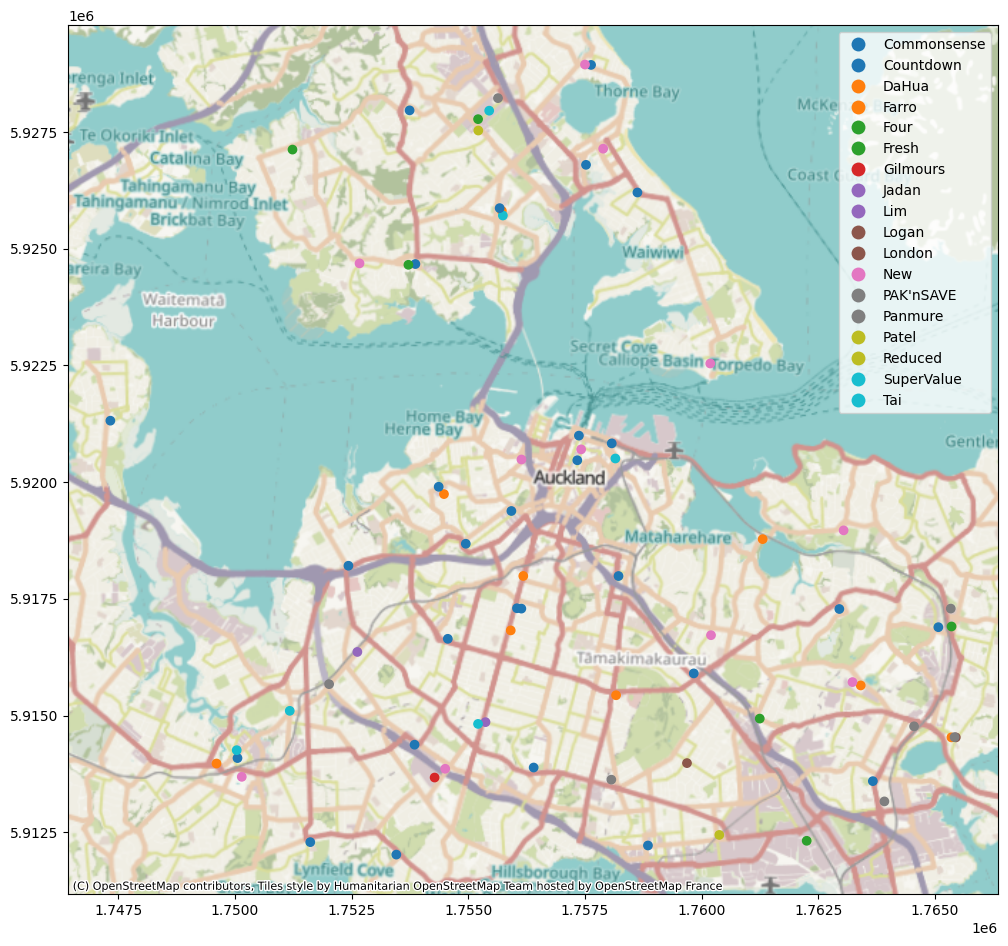

In [6]:
# plot auckland supermarkets
supermarkets.set_geometry('centroid', inplace=True) # set geom to centroids for plotting
ax = supermarkets.plot(column='organisation', legend=True, categorical=True, figsize=(12, 12))
cx.add_basemap(ax, crs=supermarkets.crs)